In [8]:
import pandas as pd
import geopandas as gpd
import dask.dataframe as dd
from pathlib import Path

from shapely.geometry import Point
# import fiona

In [9]:
p = Path('/Users/alex/Dropbox/Work/Repository/OpenQuake/output')
gmf = dd.read_csv(p / 'gmf-data_4.csv')

## convert EPSG3857 to EPSG2193

In [35]:
s = pd.read_csv(p / 'sitemesh_4.csv')

geometry = [Point(xy) for xy in zip(s.lon, s.lat)]
crs = "EPSG:4326"
sites4326 = gpd.GeoDataFrame(s, crs=crs, geometry=geometry)


In [36]:
sites4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1, 'EPSG : 4326')

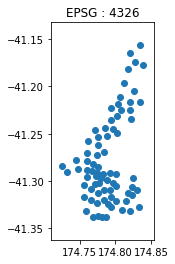

In [37]:
ax = sites4326.plot()
ax.set_title("EPSG : 4326")

In [38]:
sites2193 = sites4326.to_crs("EPSG:2193") # change to NZ2000 projection
sites2193

,site_id,lon,lat,geometry
0,0,174.8211,-41.1643,POINT (1752779.830 5441405.376)
1,1,174.7253,-41.2838,POINT (1744479.072 5428302.203)
2,2,174.7886,-41.2526,POINT (1749851.471 5431658.797)
3,3,174.8028,-41.2495,POINT (1751048.362 5431978.370)
4,4,174.7687,-41.2825,POINT (1748116.539 5428373.391)
...,...,...,...,...
71,71,174.8298,-41.3093,POINT (1753170.740 5425291.933)
72,72,174.7874,-41.3378,POINT (1749556.126 5422201.770)
73,73,174.8097,-41.3308,POINT (1751438.319 5422940.231)
74,74,174.8205,-41.3316,POINT (1752340.254 5422832.497)


Text(0.5, 1, 'EPSG : 2193')

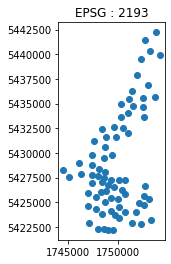

In [39]:
ax = sites2193.plot()
ax.set_title("EPSG : 2193")

In [41]:
sites2193['lon'] = sites2193['geometry'].x
sites2193['lat'] = sites2193['geometry'].y

sites2193

,site_id,lon,lat,geometry
0,0,1.752780e+06,5.441405e+06,POINT (1752779.830 5441405.376)
1,1,1.744479e+06,5.428302e+06,POINT (1744479.072 5428302.203)
2,2,1.749851e+06,5.431659e+06,POINT (1749851.471 5431658.797)
3,3,1.751048e+06,5.431978e+06,POINT (1751048.362 5431978.370)
4,4,1.748117e+06,5.428373e+06,POINT (1748116.539 5428373.391)
...,...,...,...,...
71,71,1.753171e+06,5.425292e+06,POINT (1753170.740 5425291.933)
72,72,1.749556e+06,5.422202e+06,POINT (1749556.126 5422201.770)
73,73,1.751438e+06,5.422940e+06,POINT (1751438.319 5422940.231)
74,74,1.752340e+06,5.422832e+06,POINT (1752340.254 5422832.497)


In [56]:
sites = pd.DataFrame(sites2193)
sites.drop('geometry', axis=1, inplace=True)
sites = dd.from_pandas(sites, npartitions=1)
gmfXY = dd.merge(gmf, sites, how='left', on='site_id')

In [57]:
gmfXY.to_parquet(p / 'PGAxy.parquet')

In [59]:
gmfXY.head()

,event_id,site_id,gmv_PGA,lon,lat
0,0,0,0.050537,1.752780e+06,5.441405e+06
1,0,1,0.041131,1.744479e+06,5.428302e+06
2,0,2,0.087873,1.749851e+06,5.431659e+06
3,0,3,0.060285,1.751048e+06,5.431978e+06
4,0,4,0.052327,1.748117e+06,5.428373e+06


In [60]:
gmfXY.tail()

,event_id,site_id,gmv_PGA,lon,lat
400837,277407,71,0.031159,1.753171e+06,5.425292e+06
400838,277407,72,0.022352,1.749556e+06,5.422202e+06
400839,277407,73,0.015164,1.751438e+06,5.422940e+06
400840,277407,74,0.011579,1.752340e+06,5.422832e+06
400841,277407,75,0.027701,1.753387e+06,5.423233e+06
